In [1]:
import pandas as pd
import numpy as np

In [12]:
d = pd.read_csv("diabetesLogistic.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
x = d.iloc[:,0:-1]
y = d.iloc[:,-1]

In [16]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
from scipy.stats import chi2_contingency
x = d.iloc[:,0:-1]
y = d.iloc[:,-1]
col = x.columns
l = []
for i in col:
    tab = pd.crosstab(x[i],y)
    l.append(chi2_contingency(tab)[1])

In [18]:
l

[8.648349123362548e-08,
 5.1045667798171764e-11,
 0.1721569902912903,
 0.016681406114890975,
 0.017596214168718233,
 0.04282346357874613,
 0.29290546216135716,
 2.3069818149863462e-10]

In [19]:
df = pd.DataFrame()
df['Features'] = x.columns
df['Importance'] = l
df = df.sort_values('Importance', ascending = True)
df

,Features,Importance
1,Glucose,5.104567e-11
7,Age,2.306982e-10
0,Pregnancies,8.648349e-08
3,SkinThickness,1.668141e-02
4,Insulin,1.759621e-02
5,BMI,4.282346e-02
2,BloodPressure,1.721570e-01
6,DiabetesPedigreeFunction,2.929055e-01


Text(Age, 0.06, 'cutoff')

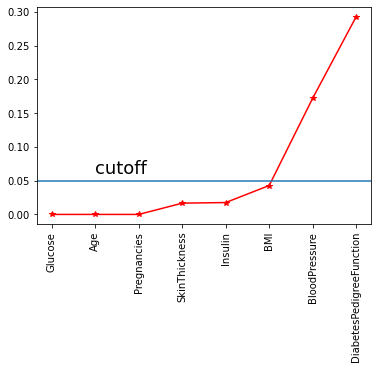

In [24]:
import matplotlib.pyplot as plt

#plt.bar(df.Features,df.Importance)
plt.plot(df.Features,df.Importance, color = 'red', marker = '*')
plt.xticks(rotation = 90)
plt.axhline(y = .05)
plt.text(x = 'Age' , y = .06 , s=  "cutoff", size = 18)

In [25]:
x1 = x
y1 = y

In [26]:
x = np.array(x)
y = np.array(y)

In [10]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from boruta import BorutaPy

In [31]:
boruta_feature_selector = BorutaPy(rf, max_iter=20, verbose=2)
boruta_feature_selector.fit(x,y)

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 20
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 20
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 20
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 20
Confirmed: 	4
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	13 / 20
Confirmed: 	4
Tentative: 	0
Rejected: 	4


BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x23C2AD8D440),
         max_iter=20, random_state=RandomState(MT19937) at 0x23C2AD8D440,
         verbose=2)

In [32]:
boruta_feature_selector.support_

array([False,  True, False, False, False,  True,  True,  True])

In [33]:
x1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [34]:
df1 = pd.DataFrame()
df1['Features'] = x1.columns
df1['Importance']= boruta_feature_selector.support_

In [35]:
df1

,Features,Importance
0,Pregnancies,False
1,Glucose,True
2,BloodPressure,False
3,SkinThickness,False
4,Insulin,False
5,BMI,True
6,DiabetesPedigreeFunction,True
7,Age,True
